In [12]:
from plots import *
%load_ext autoreload
%autoreload 2

# Dirichlet Distributions

### Joint Probability Distributions

A joint probability distribution has the form $p(x_1,\ldots,x_D)$ for a set of $D > 1$ variables, and models the (stochastic) relationships between the variables. If all the variables are discrete, we can represent the joint distribution as a big multi-dimensional array, with one variable per dimension. However, the number of parameters needed to define such a model is $O(K^D)$, where $K$ is the number of states of each variable.

We can define high dimensional joint distributions using fewer parameters by making conditional independence assumptions. In the case of continuous distributions, an alternative approach is to restrict the form of the pdf to certain functional forms.

### Multivariate Gaussian
The pdf of MVN in $D$ dimensions is defined by the following:

$$
\mathcal{N}(\mathbf{x}|\boldsymbol{\mu}, \boldsymbol{\Sigma})\triangleq \frac{1}{(2\pi)^{D/2}|\boldsymbol{\Sigma}|^{1/2}}\exp\left[-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^T\boldsymbol{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu})\right]
$$

### Motivating Dirichlet distributions 

To understand what the Dirichlet distribution describes, it is useful to consider how it can characterize the variability of a random [multinomial distribution](https://en.wikipedia.org/wiki/Multinomial_distribution). Suppose we are going to manufacture 6-sided dice, but we want the allowable outcome of a die roll to be 1, 2, or 3. If we produce a fair die, then the probabilities of the three outcomes will be equal (1/3). We can represent the probabilities for the possible outcomes as a vector $\boldsymbol{\theta}$:
$$
\boldsymbol{\theta} = \left(\frac{1}{3}, \frac{1}{3}, \frac{1}{3}\right)
$$
Regardless of whether we produce a fair or loaded die, $\boldsymbol{\theta}$ has two important properties. First, the sum of probabilities for each outcome must equal 1:

$$
\sum_i \boldsymbol{\theta}_i = \boldsymbol{\theta}_1 + \boldsymbol{\theta}_2 + \boldsymbol{\theta}_3 = 1
$$

The second property is that none of the probabilities can be negative. When these conditions hold, probabilities associated with the results of rolling the die are described by a multinomial distribution.

However, we expect there will be some variabilities in the characteristics of the dice we produce, so even if we try to produce fair dice, we won't expect the probabilities of each outcome for a particular die will be exactly 1/3, due to variabilities in the production process. 

To characterize this variability mathematically, we would like to know the probability density of every possible value of $\boldsymbol{\theta}$ for a given manufacturing process. To do this, let's consider each element of $\boldsymbol{\theta}$ as being an independent variable. That is, for $\boldsymbol{\theta} = \{\theta_1, \theta_2, \theta_3\}$, we can treat $\theta_1$, $\theta_2$ and $\theta_3$ each as an independent variable and $\boldsymbol{\theta}$ as a vector in 3-dimensional space. Since the multinomial distribution requires that these three variables sum to 1, we know that the allowable values of $\boldsymbol{\theta}$ are confined to a plane. Furthermore, since each value $\theta_i$ must be greater than or equal to zero, the set of all allowable values of $\boldsymbol{\theta}$ is confined to an equilateral triangle (a 2-simplex).

What we want to know is the probability density at each point on this triangle. This is where the Dirichlet distribution can help us: we can use it as the prior for the multinomial distribution.

### Beta distribution (required to understand the Dirichlet distribution)
The **beta distribution** has support over the interval [0, 1] and is defined as follows:

$$
\mathrm{Beta}(x|a, b) = \frac{1}{B(a, b)}x^{a-1}(1-x)^{b-1}
$$

Here $B(p, q)$ is the beta function,

$$
B(a, b) \triangleq \frac{\Gamma(a)\Gamma(b)}{\Gamma(a+b)}
$$

We require $a, b > 0$ to ensure the distribution is integrable (i.e. to ensure $B(a, b)$ exists). If $a = b = 1$, we get the uniform distribution. If $a$ and $b$ are both less than 1, we get a bimodal distribution with 'spikes' at 0 and 1; if $a$ and $b$ are both greater than 1, the distribution is unimodal. For later reference, we note that the distribution has the following properties:

mean = $\frac{a}{a+b}$, mode = $\frac{a-1}{a+b-2}$, var = $\frac{ab}{(a+b)^2(a+b+1)}$.

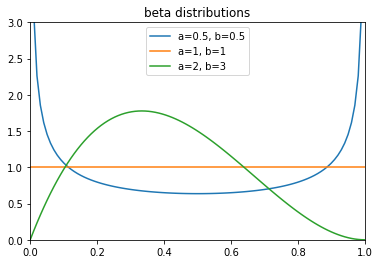

In [11]:
beta_distribution()

### Dirichlet distribution
The Dirichlet distribution defines a probability density for a vector valued input having the same characteristics as our multinomial parameter $\boldsymbol{\theta}$. 
It is a multivariate generalization of the beta distribution, which has support over the **probability simplex**, defined by

$$
S_K = \{\boldsymbol{\theta}: 0\le \theta_k\le 1, \sum_{k=1}^K\theta_k = 1\}
$$

The pdf is defined as follows:

$$
\mathrm{Dir}(\boldsymbol{\theta}|\boldsymbol{\alpha})\triangleq \frac{1}{B(\boldsymbol{\alpha})}\prod_{k=1}^K \boldsymbol{\theta}_k^{\alpha_k-1}\mathbb{I}(\boldsymbol{\theta} \in S_K)
$$
where $B(\alpha_1,\ldots,\alpha_K)$ is the natural generalization of the beta function to $K$ variables:

$$
B(\boldsymbol{\alpha})\triangleq \frac{\prod_{k=1}^K\Gamma(\alpha_k)}{\Gamma(\alpha_0)}
$$
where $\alpha_0\triangleq \sum_{k=1}^K\alpha_k$.

Some details worth noting: The Dirichlet distribution is parameterized by the vector $\boldsymbol{\alpha}$, which has the same number of elements ($K$) as our multinomial parameter $\boldsymbol{\theta}$. In our case, $k=3$. So you can interpret $p(\boldsymbol{\theta}|\boldsymbol{\alpha})$ as answering the question "what is the probability density associated with multinomial distribution $\boldsymbol{\theta}$, given that our Dirichlet distribution has parameter $\boldsymbol{\alpha}$." 

### Visualising the Dirichlet distribution
Let's visualise how $\mathrm{Dir}(\boldsymbol{\alpha})$ varies over the simplex of allowable values of $\boldsymbol{\theta}$ for a given value of $\boldsymbol{\alpha}$. This requires us to do three things:
1. Generate a set of `x-y` coordinates over our triangle
2. Map the `x-y` coordinates to the 2-simplex coordinate space
3. Compute $\mathrm{Dir}(\boldsymbol{\alpha})$ for each point.

The script is in [dirichlet_plot.py](dirichlet_plot.py)

We see that $\alpha_0 = \sum_{k=1}^K \alpha_k$ controls the strength of the distribution (how peaked it is). If $\alpha_k < 1$ for all $k$, we get 'spikes' at the corners of the simplex.

### Properties of the Dirichlet distribution
$$
\mathbb{E}[x_k] = \frac{\alpha_k}{\alpha_0}
$$
$$
\mathrm{mode}[x_k] = \frac{\alpha_k - 1}{\alpha_0 - K}
$$
$$
\mathrm{var}[x_k] = \frac{\alpha_k(\alpha_0-\alpha_k)}{\alpha_0^2(\alpha_0 + 1)}
$$
where $\alpha_0 = \sum_k \alpha_k$. Often we use a symmetric Dirichlet prior of the form $\alpha_k = \alpha/K$. In this case, the mean becomes $1/K$, and the variance becomes $\mathrm{var}[x_k] = \frac{K-1}{K^2(\alpha + 1)}$. So increasing $\alpha$ increases the precision (decreases the variance) of the distribution.

In [31]:
from dirichlet_plot import *

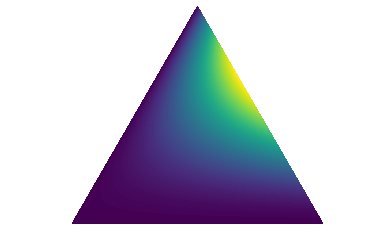

In [32]:
corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
pld = PlotDirichlet(corners)
pld.draw_pdf_contours(Dirichlet([1, 2, 3]))

The triangle doesn't have to be equilateral

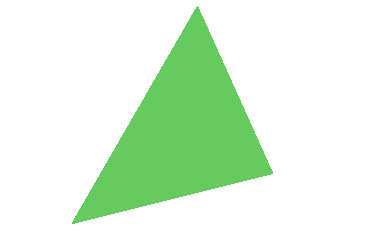

In [35]:
corners = np.array([[0, 0], [0.8, 0.2], [0.5, 0.75**0.5]])
pld1 = PlotDirichlet(corners)
pld1.draw_pdf_contours(Dirichlet([1, 1, 1]))

As in the Beta distribution, for values of $\alpha_i < 1$, the distribution concentrates in the corners and along the boundaries of the simplex

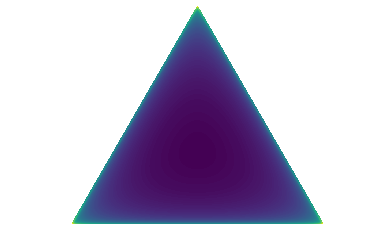

In [41]:
corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
pld = PlotDirichlet(corners)
pld.draw_pdf_contours(Dirichlet([0.99, 0.99, 0.99]))

For values of $\alpha_i > 1$, the distribution tends toward the centre of the simplex.

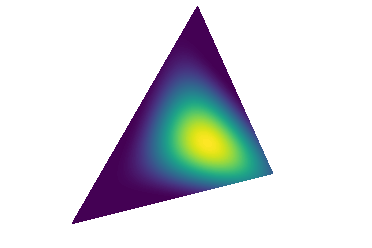

In [38]:
pld1.draw_pdf_contours(Dirichlet([3, 3, 3]))

As $\alpha_i$ increases, the distribution becomes more tightly concentrated around the center of the simplex.

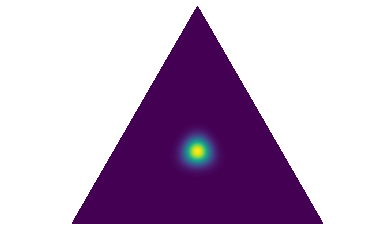

In [42]:
pld1.draw_pdf_contours(Dirichlet([50, 50, 50]))

In the context of our example of manufacturing dice, we would produce consistently fair dice in the limit as $\alpha_i \rightarrow\infty$.

For a symmetric Dirichlet with $\alpha_i > 1$, we will produce a fair dice, on average. If the goal is to produce loaded dice (e.g. with a higher probability of rolling a 3), we would want an asymmetric Dirichlet distribution with a higher value for $\alpha_3$.

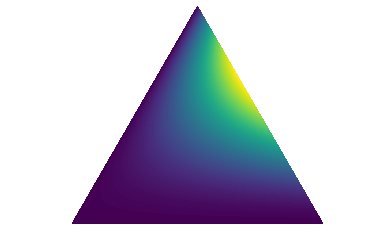

In [28]:
pld.draw_pdf_contours(Dirichlet([1, 2, 3]))

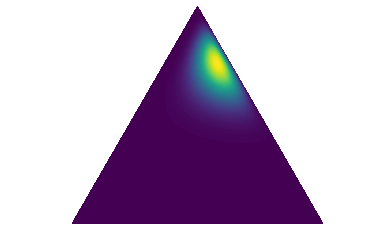

In [43]:
pld.draw_pdf_contours(Dirichlet([2, 5, 15]))